# SETUP

In [2]:
# Loading necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import os
import time
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [11]:
# Creating path for UTKFace dataset
pathtrain = Path("FairFace/train")
filetrain = list(map(lambda x: x.name, pathtrain.glob('*.jpg')))

pathval = Path("FairFace/val")
fileval = list(map(lambda x: x.name, pathtest.glob('*.jpg')))

In [16]:
# Create DataFrames with the file names
train_df = pd.DataFrame(filetrain, columns=['file'])
val_df = pd.DataFrame(fileval, columns=['file'])

In [17]:
# Viewing length of filenames
print(len(train_df))
print(len(val_df))

86744
10954


In [18]:
print(train_df[:5])
print("----------------------------------------------------------------")
print(val_df[:5])

        file
0      1.jpg
1     10.jpg
2    100.jpg
3   1000.jpg
4  10000.jpg
----------------------------------------------------------------
        file
0      1.jpg
1     10.jpg
2    100.jpg
3   1000.jpg
4  10000.jpg


In [19]:
# Viewing data types of the DataFrame
print("\nTrain Data Types:")
print(train_df.dtypes)

print("\nValidation Data Types:")
print(val_df.dtypes)


Train Data Types:
file    object
dtype: object

Validation Data Types:
file    object
dtype: object


# EXPLORATORY DATA ANALYSIS

In [4]:
# Assuming the CSV files are in the same directory as your notebook/script
train_labels_path = "FairFace/fairface_label_train.csv"
val_labels_path = "FairFace/fairface_label_val.csv"

# Read the CSV files into DataFrames
train_labels = pd.read_csv(train_labels_path)
val_labels = pd.read_csv(val_labels_path)

In [22]:
# Display the first few rows of each DataFrame to verify the data has been loaded correctly
print("Train Labels:")
print(train_labels.head())

print("\nValidation Labels:")
print(val_labels.head())

Train Labels:
          file    age  gender        race  service_test
0  train/1.jpg  50-59    Male  East Asian          True
1  train/2.jpg  30-39  Female      Indian         False
2  train/3.jpg    3-9  Female       Black         False
3  train/4.jpg  20-29  Female      Indian          True
4  train/5.jpg  20-29  Female      Indian          True

Validation Labels:
        file    age  gender             race  service_test
0  val/1.jpg    3-9    Male       East Asian         False
1  val/2.jpg  50-59  Female       East Asian          True
2  val/3.jpg  30-39    Male            White          True
3  val/4.jpg  20-29  Female  Latino_Hispanic          True
4  val/5.jpg  20-29    Male  Southeast Asian         False


In [23]:
# Viewing data info for train_labels
train_labels.info()

# Viewing data info for val_labels
val_labels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          86744 non-null  object
 1   age           86744 non-null  object
 2   gender        86744 non-null  object
 3   race          86744 non-null  object
 4   service_test  86744 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          10954 non-null  object
 1   age           10954 non-null  object
 2   gender        10954 non-null  object
 3   race          10954 non-null  object
 4   service_test  10954 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 353.1+ KB


## Count of null values

In [24]:
# Checking for null values in train_labels
print("Null values in train_labels:")
print(train_labels.isnull().sum())

# Checking for null values in val_labels
print("\nNull values in val_labels:")
print(val_labels.isnull().sum())


Null values in train_labels:
file            0
age             0
gender          0
race            0
service_test    0
dtype: int64

Null values in val_labels:
file            0
age             0
gender          0
race            0
service_test    0
dtype: int64


## Data Visualization

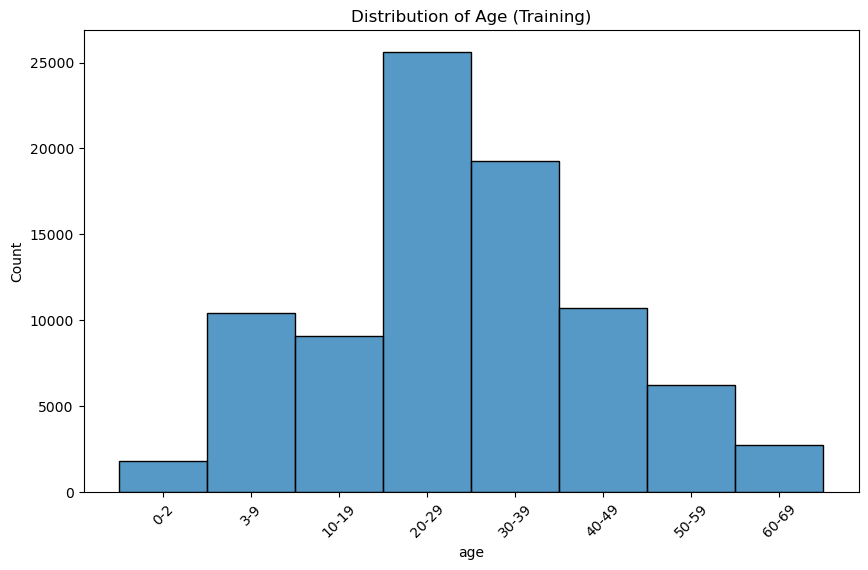

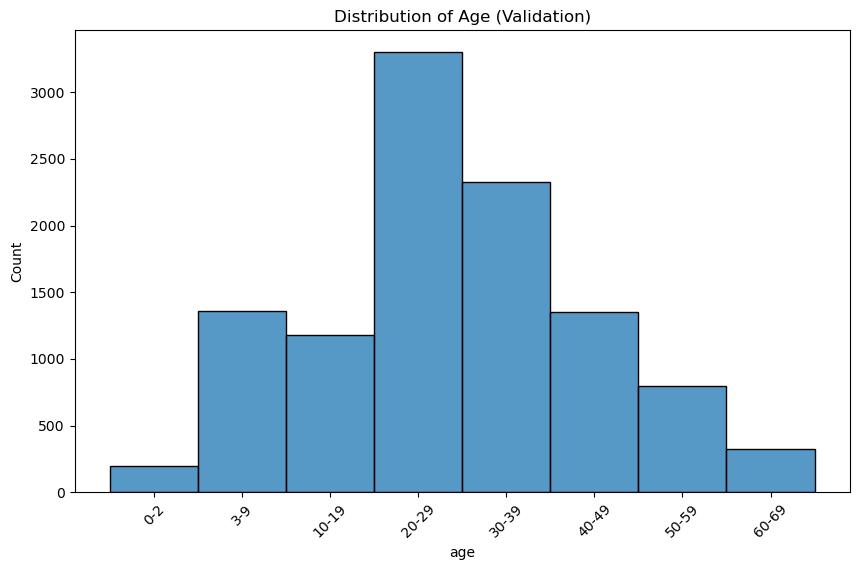

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

# Define the order of age categories
age_order = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Convert the 'age' column to an ordered categorical variable
age_dtype = CategoricalDtype(categories=age_order, ordered=True)
train_labels['age'] = train_labels['age'].astype(age_dtype)
val_labels['age'] = val_labels['age'].astype(age_dtype)

# Create a histogram for the training dataset with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.histplot(train_labels['age'], bins=len(age_order), edgecolor='black').set(title="Distribution of Age (Training)")
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the plot
plt.show()

# Create a histogram for the validation dataset with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.histplot(val_labels['age'], bins=len(age_order), edgecolor='black').set(title="Distribution of Age (Validation)")
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the plot
plt.show()


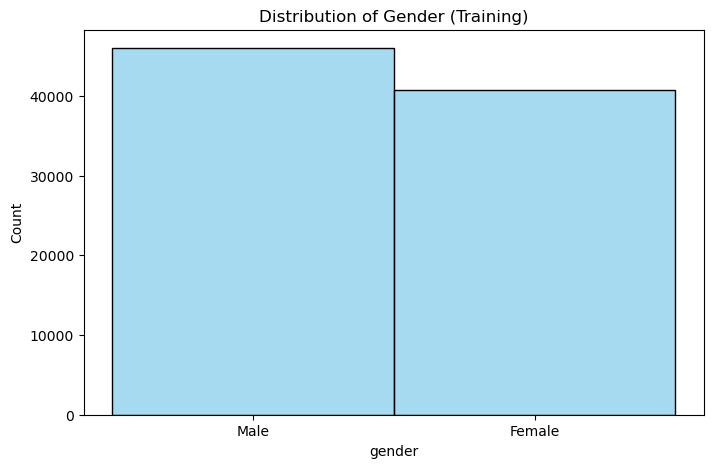

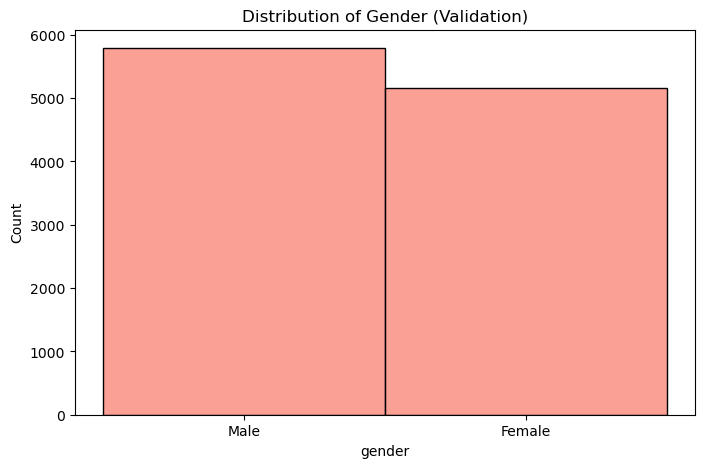

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the training dataset
plt.figure(figsize=(8, 5))
sns.histplot(train_labels['gender'], edgecolor='black', color='skyblue').set(title="Distribution of Gender (Training)")

# Show the plot
plt.show()

# Create a histogram for the validation dataset
plt.figure(figsize=(8, 5))
sns.histplot(val_labels['gender'], edgecolor='black', color='salmon').set(title="Distribution of Gender (Validation)")

# Show the plot
plt.show()


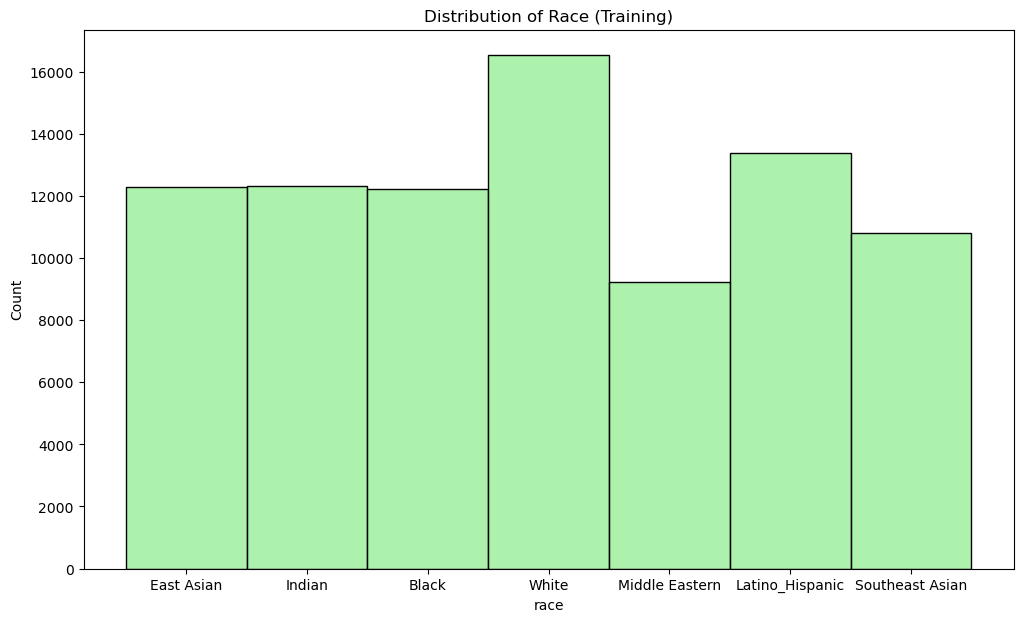

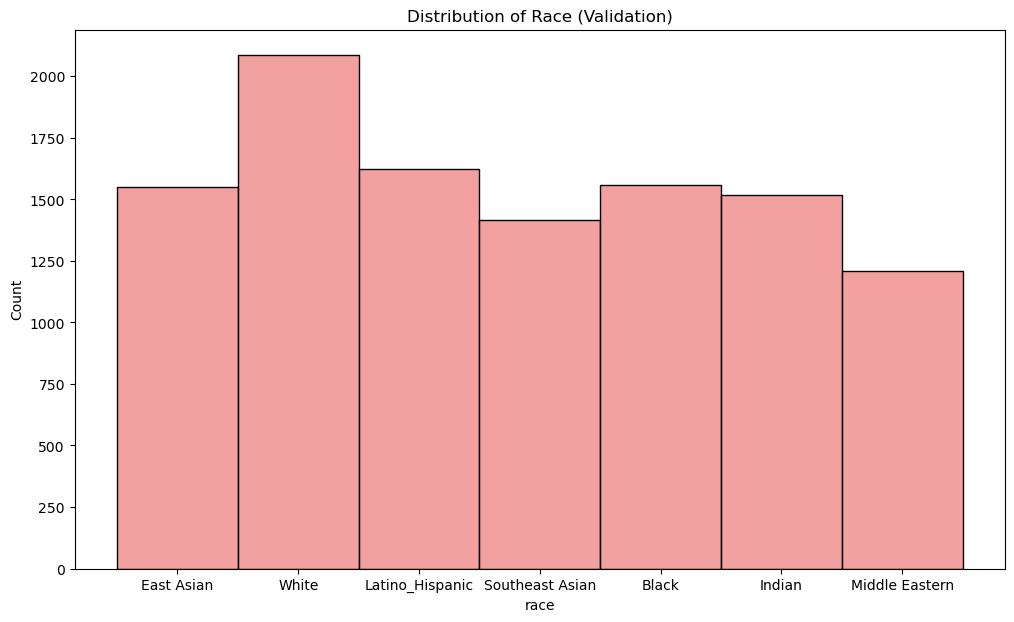

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the training dataset
plt.figure(figsize=(12, 7))
sns.histplot(train_labels['race'], edgecolor='black', color='lightgreen').set(title="Distribution of Race (Training)")

# Show the plot
plt.show()

# Create a histogram for the validation dataset
plt.figure(figsize=(12, 7))
sns.histplot(val_labels['race'], edgecolor='black', color='lightcoral').set(title="Distribution of Race (Validation)")

# Show the plot
plt.show()


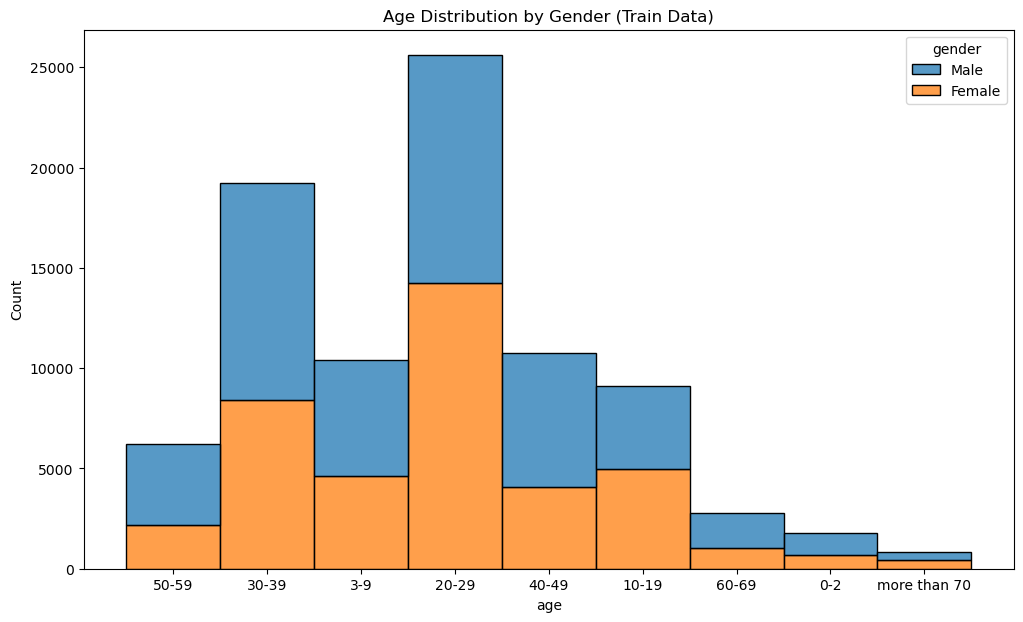

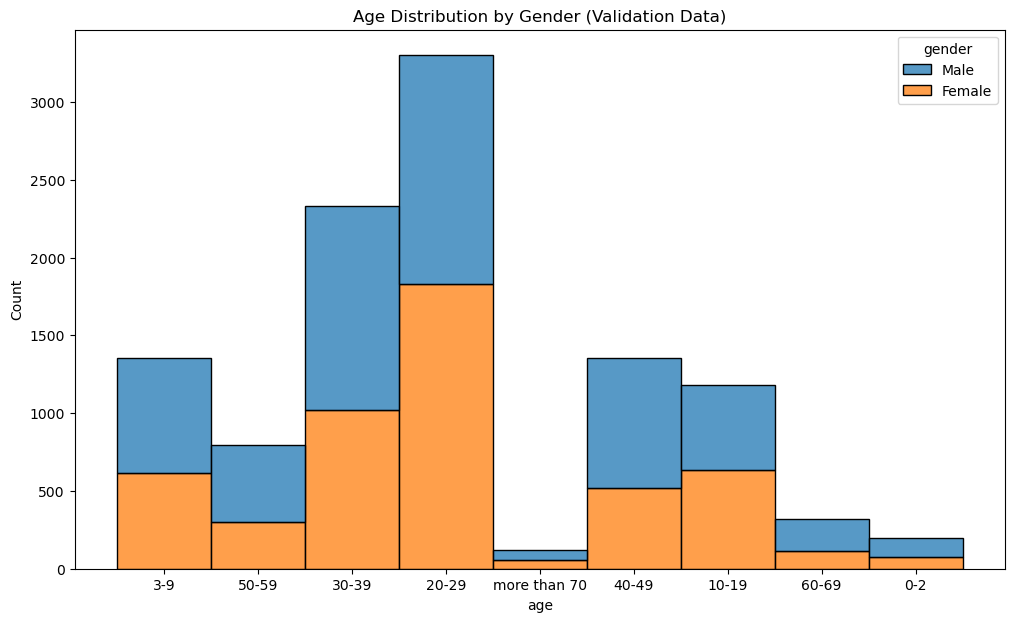

In [8]:
# Age Distribution by Gender for Train Data
plt.figure(figsize=(12, 7))
sns.histplot(train_labels, x='age', hue='gender', multiple='stack', edgecolor='black').set(title="Age Distribution by Gender (Train Data)")
plt.show()

plt.figure(figsize=(12, 7))
sns.histplot(val_labels, x='age', hue='gender', multiple='stack', edgecolor='black').set(title="Age Distribution by Gender (Validation Data)")
plt.show()

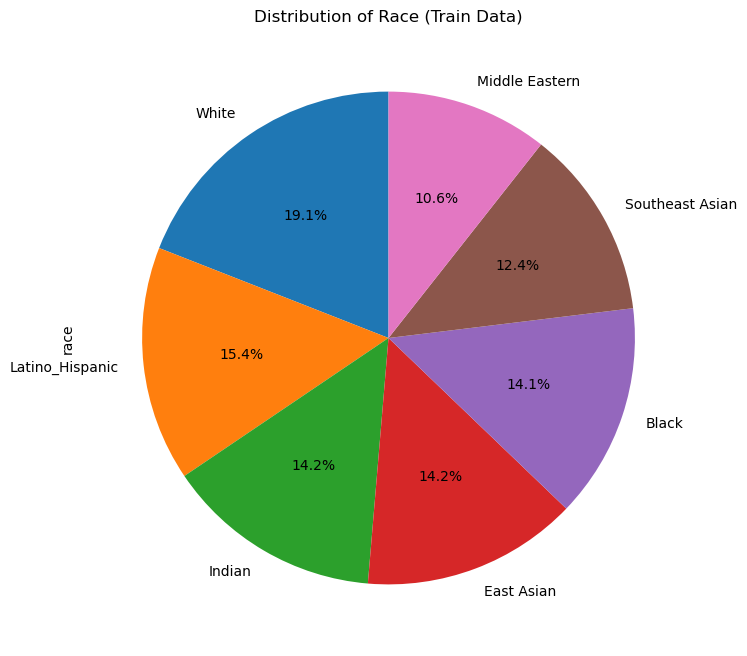

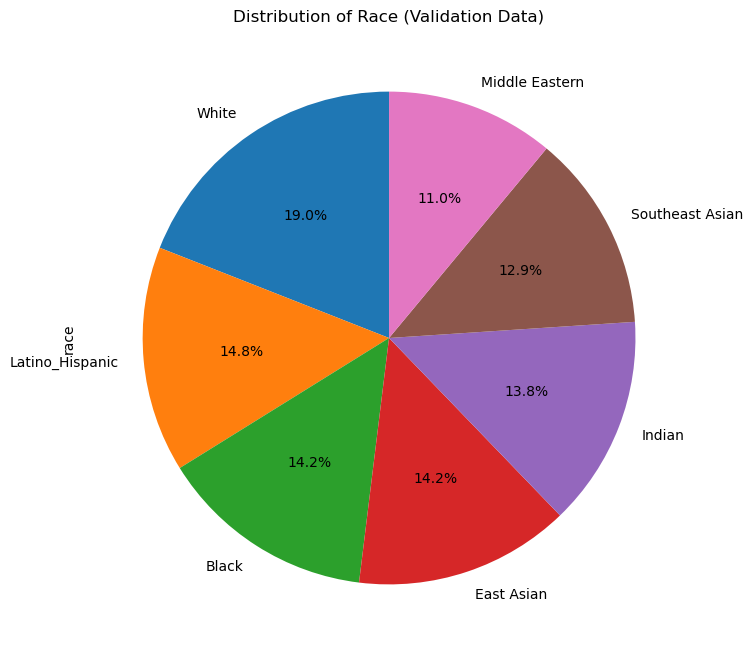

In [48]:
# Pie chart for the distribution of race in Train Data
plt.figure(figsize=(8, 8))
train_labels['race'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Race (Train Data)")
plt.show()

# Pie chart for the distribution of race in Validation Data
plt.figure(figsize=(8, 8))
val_labels['race'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Race (Validation Data)")
plt.show()
